In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("Default_Fin.csv")
raw_data.head(10)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


In [3]:
raw_data.describe(include='all')

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [5]:
raw_data.isnull().sum()
## No Missing Values

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

## Plotting defaulters vs different features 

In [18]:
data_defaulted = raw_data[raw_data['Defaulted?']==0]


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


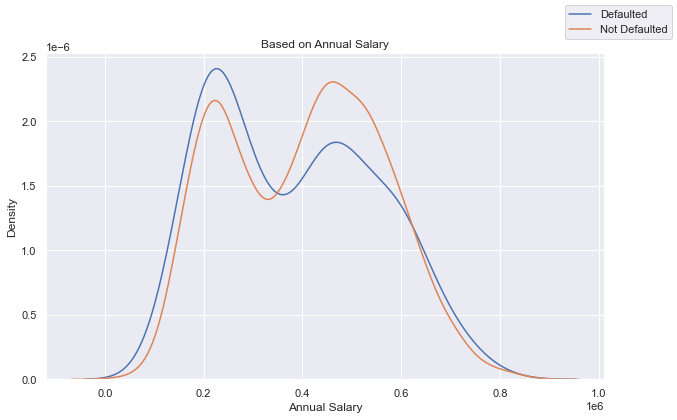

In [24]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(raw_data[raw_data['Defaulted?']==1]['Annual Salary'])
sns.kdeplot(raw_data[raw_data['Defaulted?']==0]['Annual Salary'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.title('Based on Annual Salary')
plt.show()

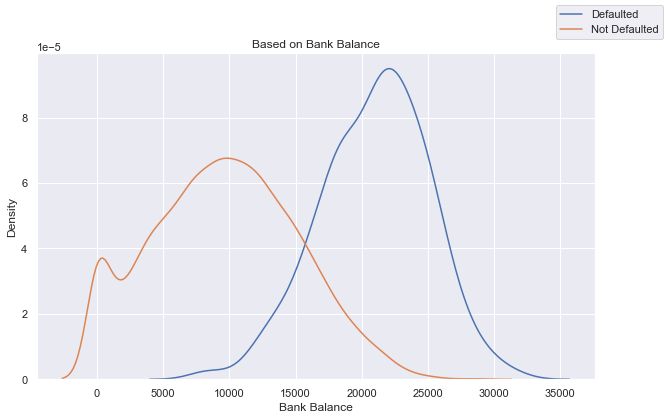

In [26]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(raw_data[raw_data['Defaulted?']==1]['Bank Balance'])
sns.kdeplot(raw_data[raw_data['Defaulted?']==0]['Bank Balance'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.title('Based on Bank Balance')
plt.show()

## Scaling data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
data = raw_data.drop(['Index'],axis=1)
data

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [33]:
scaler = StandardScaler()
columns_scale = ['Bank Balance','Annual Salary']
data[columns_scale] = scaler.fit_transform(data[columns_scale])
data

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,-0.218828,0.813188,0
1,0,-0.037617,-1.605496,0
2,1,0.492412,-0.131212,0
3,1,-0.632894,0.164031,0
4,1,-0.102782,0.370915,0
...,...,...,...,...
9995,1,-0.255979,1.460366,0
9996,1,-0.160050,-1.039014,0
9997,1,0.020747,1.883565,0
9998,1,1.516744,0.236363,0


## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
inputs = data.drop(['Defaulted?'],axis=1)
target = data['Defaulted?']
inputs

,Employed,Bank Balance,Annual Salary
0,1,-0.218828,0.813188
1,0,-0.037617,-1.605496
2,1,0.492412,-0.131212
3,1,-0.632894,0.164031
4,1,-0.102782,0.370915
...,...,...,...
9995,1,-0.255979,1.460366
9996,1,-0.160050,-1.039014
9997,1,0.020747,1.883565
9998,1,1.516744,0.236363


In [36]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Defaulted?, dtype: int64

In [38]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=365)
x_train.shape

(8000, 3)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [43]:
reg_log = LogisticRegression(class_weight='balanced')
reg_log.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [44]:
reg_log.coef_

array([[0.46758402, 2.7228116 , 0.11164086]])

In [45]:
y_pred = reg_log.predict(x_train)

In [47]:
print(confusion_matrix(y_train,y_pred))

[[6677 1060]
 [  28  235]]


In [53]:
accuracy = accuracy_score(y_pred,y_train)*100
print(f"The accuracy using the train data is {accuracy}%")

The accuracy using the train data is 86.4%


In [50]:
y_pred_test = reg_log.predict(x_test)
print(confusion_matrix(y_test,y_pred_test))

[[1661  269]
 [   6   64]]


In [52]:
accuracy_test = accuracy_score(y_pred_test,y_test)*100
print(f"The accuracy using the test data is {accuracy_test}%")

The accuracy using the test data is 86.25
